# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd

In [42]:
import numpy as np

# Data File Reading Section
## Write code to read in data from external sources here

In [3]:
#read datasets
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [10]:
# Your code for this section here ...
#1
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [11]:
#2
data.shape

(435742, 13)

In [12]:
#3
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [20]:
#4
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [21]:
#5
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [25]:
#6
print(data.head(10))
print(data.tail(10))

  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
5    152.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
6    150.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
7    151.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
8    152.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
9    151.0       May - M051990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [33]:
# Cleaning up the data

#dropping columns that aren't required
# ... your code here
Cdata = data.drop(columns = ['stn_code','agency','sampling_date',"location_monitoring_station"])
Cdata.head()
# dropping rows where no date is available
# ... your code here
Cdata = Cdata[Cdata['date'].notna()]

In [35]:
# displaying final columns (data.columns)

# ... your code here
Cdata.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [43]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I",
         "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
Cdata.type = Cdata.type.replace(types)
Cdata.type

0           RRO
1             I
2           RRO
3           RRO
4             I
          ...  
435734    RIRUO
435735    RIRUO
435736    RIRUO
435737    RIRUO
435738    RIRUO
Name: type, Length: 435735, dtype: object

In [46]:
# Display top 10 records after codification of 'types'
# ... Your code here
Cdata.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [53]:
# ... Your code here
Cdata.date = pd.to_datetime(Cdata.date)
type(Cdata.date[1])
Cdata['year'] = Cdata.date.dt.year
Cdata.year.head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: year, dtype: int64

### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [88]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
import sklearn.impute as sk
cols = ['so2','no2','rspm','spm','pm2_5']
simp = sk.SimpleImputer(missing_values= np.nan, strategy='mean')
simp.fit(Cdata[cols])
NewData = pd.DataFrame(simp.transform(Cdata[cols]))
NewData.columns = Cdata[cols].columns
NewData['state'] = Cdata['state']
NewData['location'] = Cdata['location']
NewData['type'] = Cdata['type']
NewData['date'] = Cdata['date']
NewData['year'] = Cdata['year']
NewData.info()
NewData = NewData.dropna(subset= ['date'])
NewData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435735 entries, 0 to 435734
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   so2       435735 non-null  float64       
 1   no2       435735 non-null  float64       
 2   rspm      435735 non-null  float64       
 3   spm       435735 non-null  float64       
 4   pm2_5     435735 non-null  float64       
 5   state     435731 non-null  object        
 6   location  435731 non-null  object        
 7   type      435731 non-null  object        
 8   date      435731 non-null  datetime64[ns]
 9   year      435731 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 33.2+ MB


so2         0
no2         0
rspm        0
spm         0
pm2_5       0
state       0
location    0
type        0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [153]:
import matplotlib.pyplot as plt

### so2 status

In [162]:
# ... Your code here
So2Med = NewData.groupby(['state']).median().so2.sort_values()
So2Med

state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.300000
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

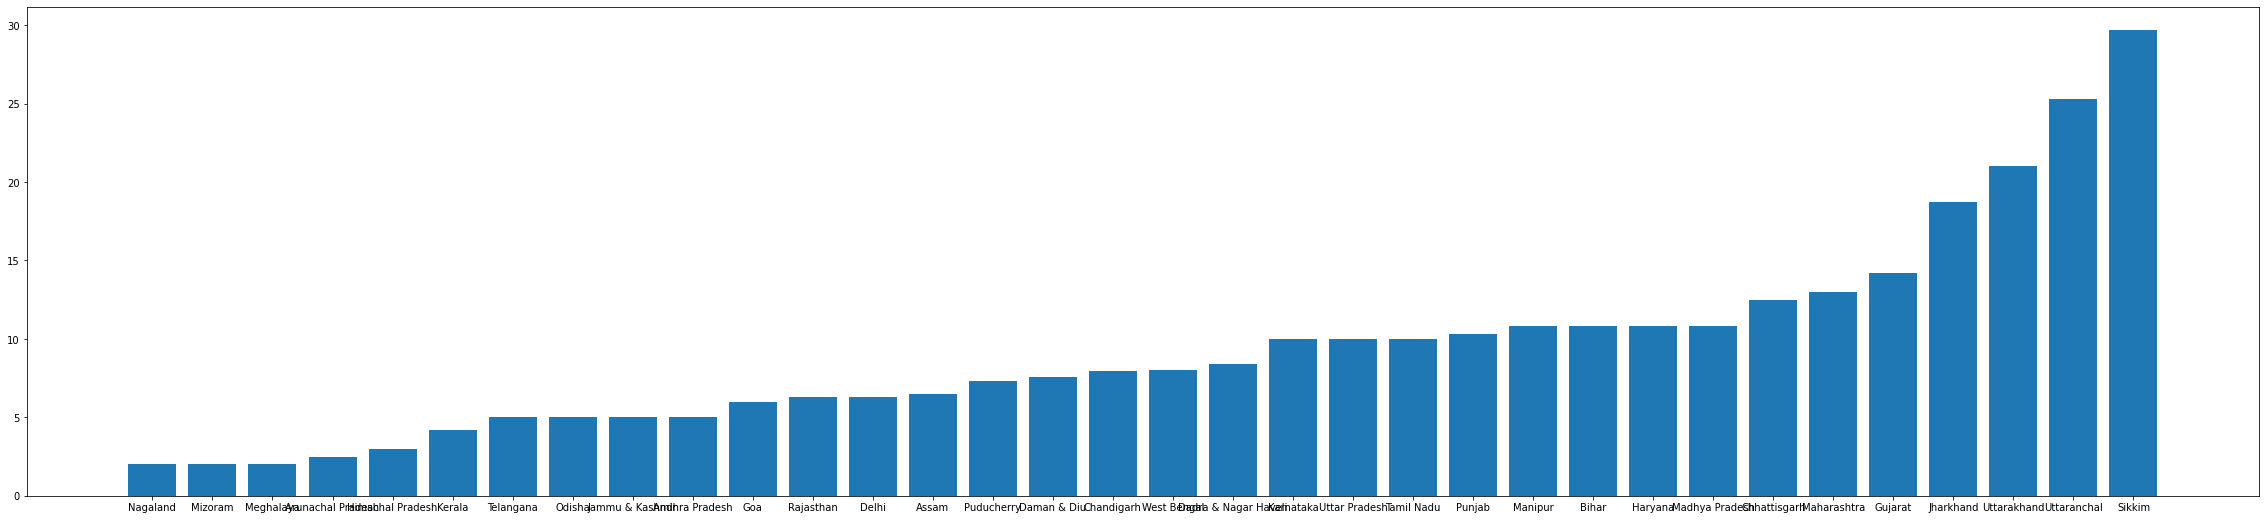

In [161]:
%matplotlib inline
plt.figure(figsize=(40, 9))
plt.bar(So2Med.index,So2Med)
plt.show()


### no2 status

In [163]:
# ... Your code here
No2Med = NewData.groupby(['state']).median().no2.sort_values()
No2Med

state
Sikkim                   1.100000
Arunachal Pradesh        5.000000
Mizoram                  5.000000
Nagaland                 7.000000
Meghalaya               10.000000
Goa                     11.600000
Puducherry              13.000000
Jammu & Kashmir         13.000000
Himachal Pradesh        13.900000
Kerala                  14.000000
Assam                   14.000000
Odisha                  16.000000
Daman & Diu             17.600000
Dadra & Nagar Haveli    18.000000
Chandigarh              18.000000
Madhya Pradesh          19.200000
Manipur                 19.850000
Andhra Pradesh          20.000000
Tamil Nadu              21.000000
Karnataka               21.200000
Chhattisgarh            21.500000
Telangana               22.000000
Haryana                 22.750000
Gujarat                 23.000000
Uttarakhand             25.809659
Rajasthan               26.000000
Uttar Pradesh           27.000000
Uttaranchal             27.700000
Punjab                  28.300000
Maharash

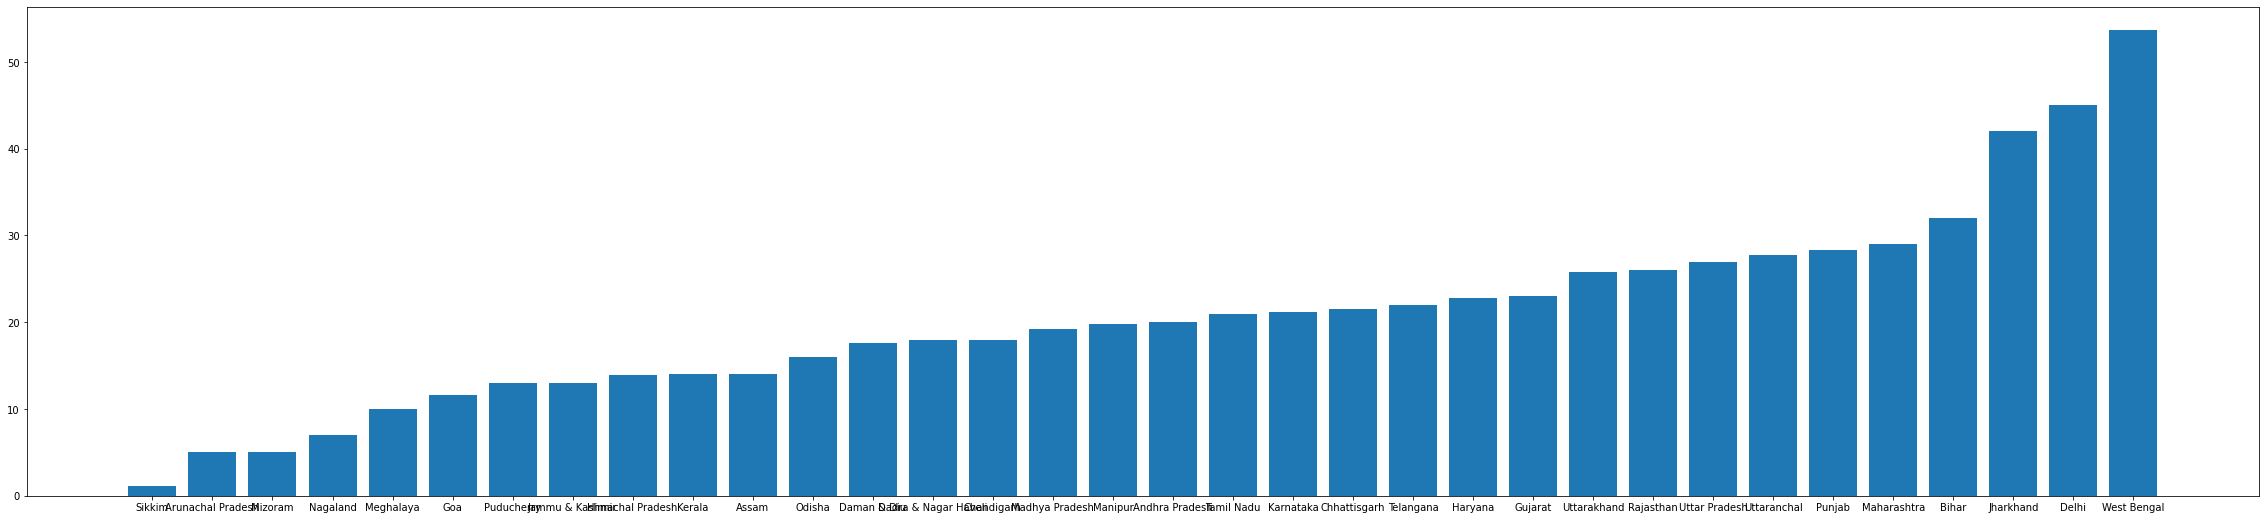

In [164]:
%matplotlib inline
plt.figure(figsize=(40, 9))
plt.bar(No2Med.index,No2Med)
plt.show()

### rspm status

In [165]:
# ... Your code here
RspmMed = NewData.groupby(['state']).median().rspm.sort_values()
RspmMed

state
Mizoram                  40.000000
Puducherry               46.000000
Kerala                   49.000000
Goa                      56.000000
Meghalaya                57.000000
Tamil Nadu               59.000000
Manipur                  61.000000
Karnataka                63.000000
Arunachal Pradesh        74.500000
Andhra Pradesh           76.000000
Assam                    77.000000
Nagaland                 78.000000
Telangana                80.000000
Odisha                   81.000000
Chandigarh               90.000000
Himachal Pradesh         90.000000
Dadra & Nagar Haveli     91.000000
Gujarat                  95.000000
Maharashtra              96.000000
West Bengal              96.000000
Chhattisgarh            108.833091
Daman & Diu             108.833091
Bihar                   108.833091
Sikkim                  108.833091
Madhya Pradesh          108.833091
Uttaranchal             111.000000
Rajasthan               112.000000
Jammu & Kashmir         116.000000
Uttarakhand   

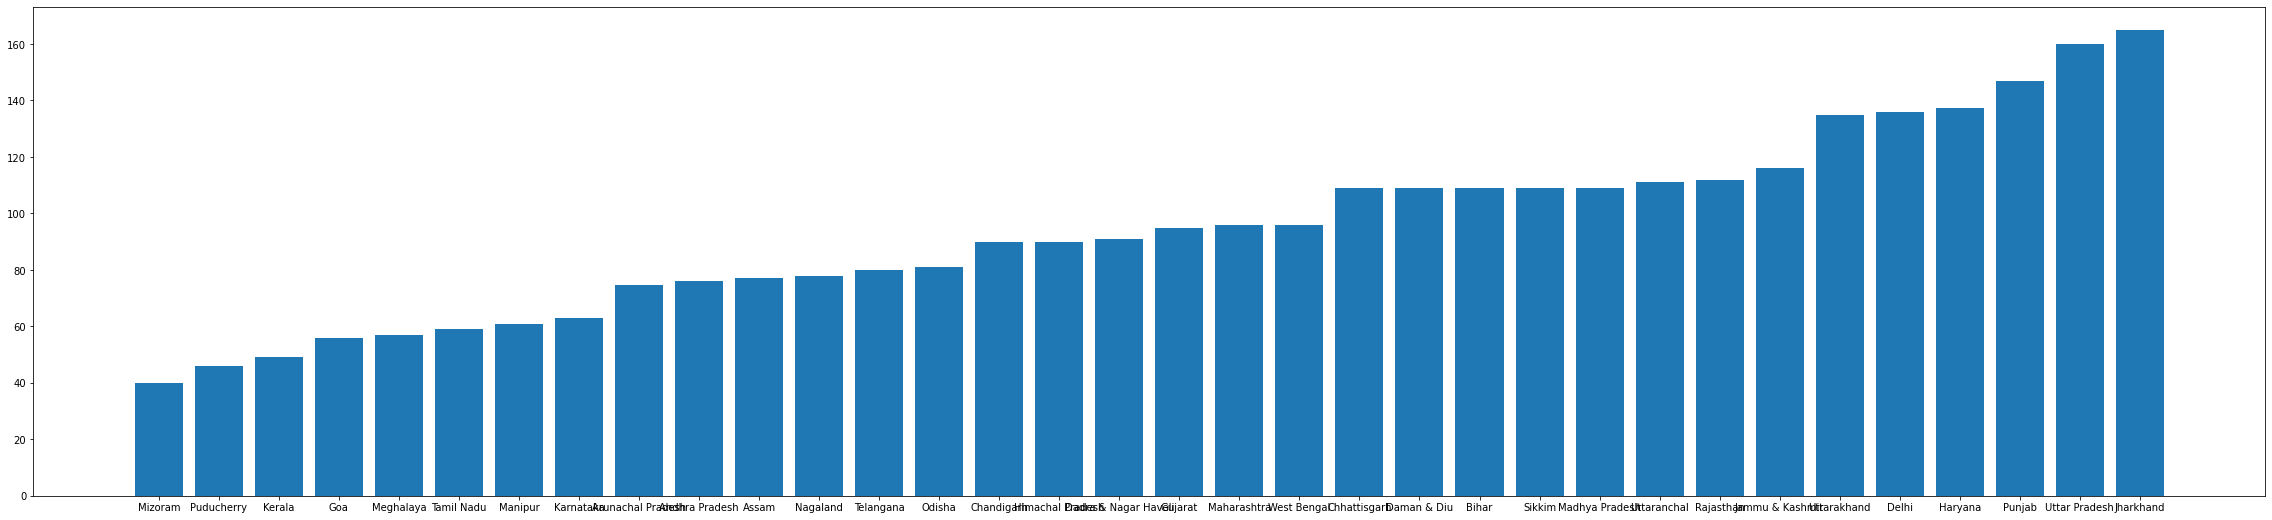

In [167]:
%matplotlib inline
plt.figure(figsize=(40, 9))
plt.bar(RspmMed.index,RspmMed)
plt.show()

### spm status

In [169]:
# ... Your code here
SpmMed = NewData.groupby(['state']).median().spm.sort_values()
SpmMed

state
Manipur                 119.00000
Puducherry              196.00000
Goa                     199.00000
Daman & Diu             200.50000
Sikkim                  213.00000
Andhra Pradesh          220.78348
Meghalaya               220.78348
Mizoram                 220.78348
Nagaland                220.78348
Odisha                  220.78348
Punjab                  220.78348
Tamil Nadu              220.78348
Telangana               220.78348
Uttar Pradesh           220.78348
Uttarakhand             220.78348
Rajasthan               220.78348
Maharashtra             220.78348
Kerala                  220.78348
Karnataka               220.78348
Jharkhand               220.78348
Jammu & Kashmir         220.78348
Himachal Pradesh        220.78348
Haryana                 220.78348
Gujarat                 220.78348
Dadra & Nagar Haveli    220.78348
Chhattisgarh            220.78348
Chandigarh              220.78348
Bihar                   220.78348
Assam                   220.78348
Arunacha

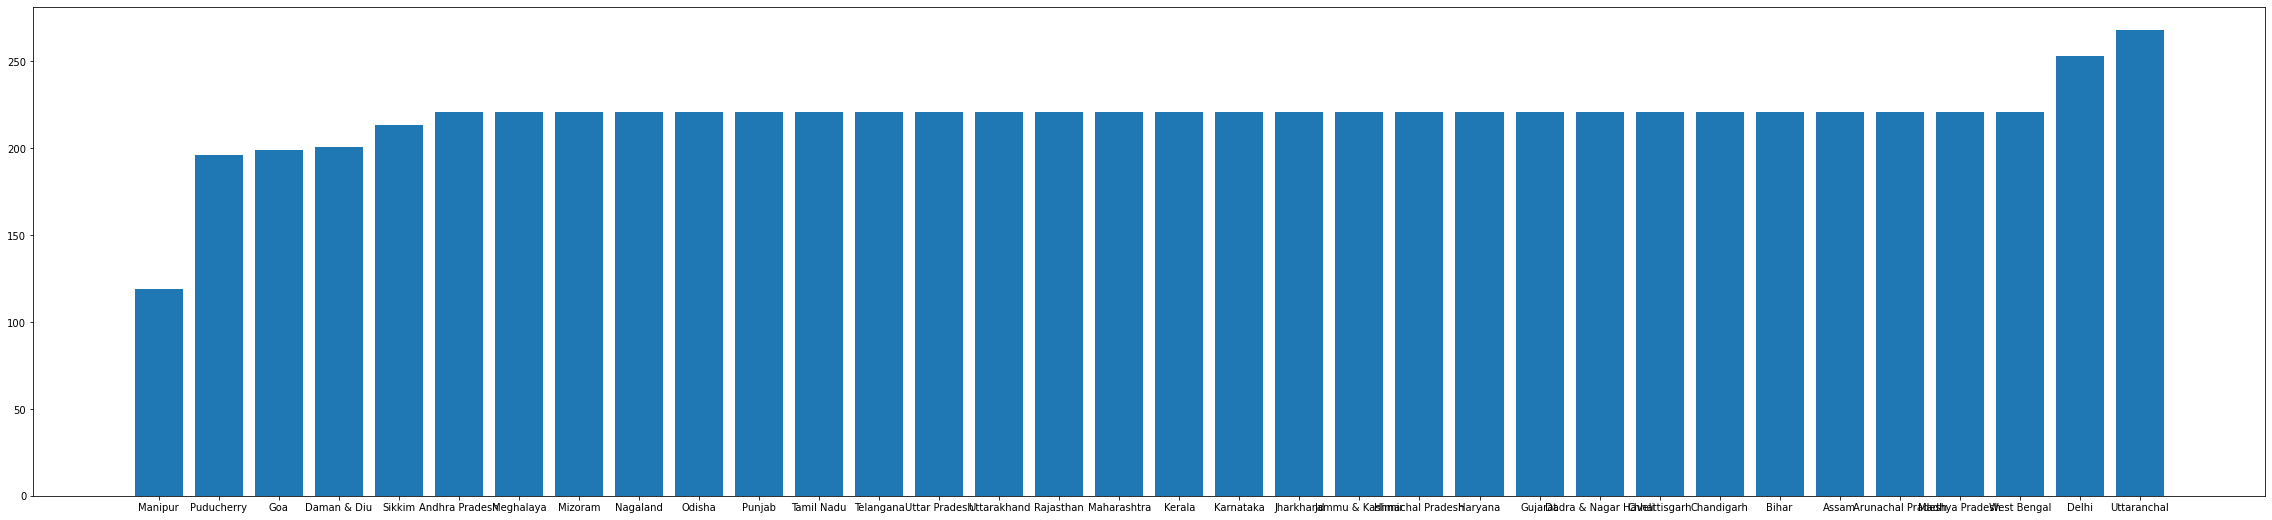

In [170]:
%matplotlib inline
plt.figure(figsize=(40, 9))
plt.bar(SpmMed.index,SpmMed)
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [182]:
# ... Your code here
AP_Data = NewData[NewData.state == 'Andhra Pradesh'].groupby('year').median()
AP_Data.head()

,so2,no2,rspm,spm,pm2_5
year,,,,,
1990.0,5.60,13.6,108.833091,179.00000,40.791467
1991.0,8.25,12.8,108.833091,141.50000,40.791467
1992.0,12.40,27.6,108.833091,192.00000,40.791467
1993.0,6.00,11.4,108.833091,220.78348,40.791467
1994.0,8.70,14.2,108.833091,220.78348,40.791467


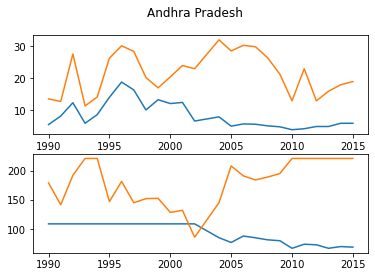

In [187]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Andhra Pradesh')
ax1.plot(AP_Data.index, AP_Data['so2'])
ax1.plot(AP_Data.index, AP_Data['no2'])
ax2.plot(AP_Data.index, AP_Data['rspm'])
ax2.plot(AP_Data.index, AP_Data['spm'])

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



In [ ]:
#It appears the median amount of suspended particulate matter has increased substantially between 2000-2015